In [7]:
import matplotlib.pyplot as plt 
import numpy as np

## Set up Pyplot interface 

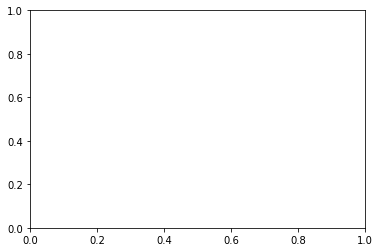

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [12]:
print('fig.axes', fig.axes)
print('ax.figure:', ax.figure)
print('ax.xaxis:', ax.xaxis)
print('ax.yaxis:', ax.yaxis)
print('ax.xaxis.axes:', ax.xaxis.axes)
print('ax.yaxis.axes:', ax.yaxis.axes)
print('ax.xaxis.figure:', ax.xaxis.figure)
print('ax.yaxis.figure:', ax.yaxis.figure)
#print('fig.xaxis:', fig.xaxis)

fig.axes [<matplotlib.axes._subplots.AxesSubplot object at 0x11a513a20>]
ax.figure: Figure(432x288)
ax.xaxis: XAxis(54.000000,36.000000)
ax.yaxis: YAxis(54.000000,36.000000)
ax.xaxis.axes: AxesSubplot(0.125,0.125;0.775x0.755)
ax.yaxis.axes: AxesSubplot(0.125,0.125;0.775x0.755)
ax.xaxis.figure: Figure(432x288)
ax.yaxis.figure: Figure(432x288)


## Artist object

There are two types of Artist, containers and primitives. As I wrote in the previous section, three components in matplotlib's hierarchy, Figure, Axes, and Axis are containers which can contain lower containers and multiple primitives such as Line2D made by ax.plot, PathCollection by ax.scatter, or Text by ax.annotate. Even tick lines and labels are in fact Line2D and Text which belong to the fourth container Tick.

ax.lines before plot:
 []
ax.lines after 1st plot:
ax.lines after 2nd plot:
 [<matplotlib.lines.Line2D object at 0x11b030748>, <matplotlib.lines.Line2D object at 0x11b0e15f8>]
line1: [<matplotlib.lines.Line2D object at 0x11b030748>]
line2: [<matplotlib.lines.Line2D object at 0x11b0e15f8>]


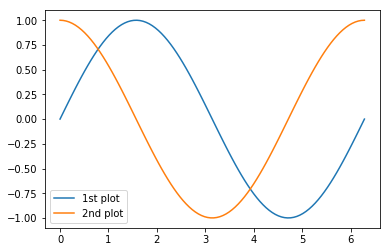

In [18]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

print('ax.lines before plot:\n', ax.lines) # empty
line1 = ax.plot(x, np.sin(x), label='1st plot') # add Line2D in ax.lines

print('ax.lines after 1st plot:\n', ax.lines)
line2 = ax.plot(x, np.sin(x+np.pi/2), label='2nd plot') # add another Line2D

print('ax.lines after 2nd plot:\n', ax.lines)

ax.legend()

print('line1:', line1)
print('line2:', line2)

In [29]:
print(ax.artists)
print(ax.patch)
print(ax.legend)
print(ax.xaxis)
print(ax.plot)
print(ax.scatter)

[]
Rectangle(xy=(0, 0), width=1, height=1, angle=0)
<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x11b185550>>
XAxis(54.000000,36.000000)
<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x11b185550>>
<bound method Axes.scatter of <matplotlib.axes._subplots.AxesSubplot object at 0x11b185550>>


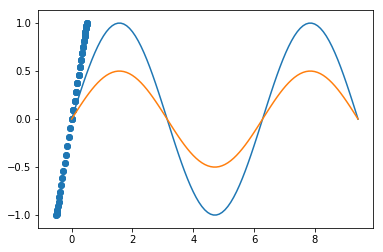

In [45]:
x = np.linspace(0, 3*np.pi, 100)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, np.sin(x), label='1st plot')
ax.plot(x, np.sin(x)/2, label='2nd plot')
ax.scatter(np.sin(x)/2, np.sin(x), label='scatter')

ax.lines before plot:
 []
ax.lines after 1st plot:
ax.lines after 2nd plot:
 [<matplotlib.lines.Line2D object at 0x11b6b2320>, <matplotlib.lines.Line2D object at 0x11b6b2630>]
ax.collections before scatter:
 []
ax.collections after scatter:
line1: Line2D(1st plot)
line2: Line2D(2nd plot)
scat: <matplotlib.collections.PathCollection object at 0x11ae39e48>


Text(0, 0.5, 'y value')

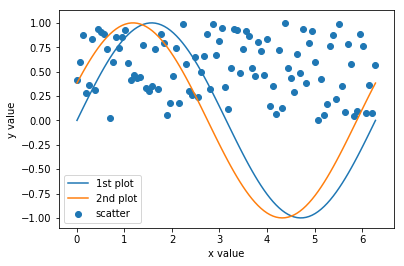

In [30]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
print('ax.lines before plot:\n', ax.lines) # empty Axes.lines
line1, = ax.plot(x, np.sin(x), label='1st plot') # add Line2D in Axes.lines
print('ax.lines after 1st plot:\n', ax.lines)
line2, = ax.plot(x, np.sin(x+np.pi/8), label='2nd plot') # add another Line2D 
print('ax.lines after 2nd plot:\n', ax.lines)

print('ax.collections before scatter:\n', ax.collections)
scat = ax.scatter(x, np.random.rand(len(x)), label='scatter') # add PathCollection in Axes.collections
print('ax.collections after scatter:\n', ax.collections)
ax.legend()
print('line1:', line1)
print('line2:', line2)
print('scat:', scat)
ax.set_xlabel('x value')
ax.set_ylabel('y value')

## Ticker object

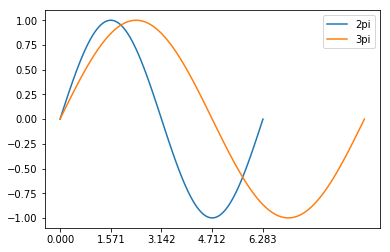

In [55]:
x = np.linspace(0, 2*np.pi, 100)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1 = ax.plot(x, np.sin(x), label='2pi') # X range: 0 to 2pi
ax.set_xticks([0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
line2 = ax.plot(1.5*x, np.sin(x), label='3pi') # X range: 0 to 3pi
ax.legend()
plt.show()

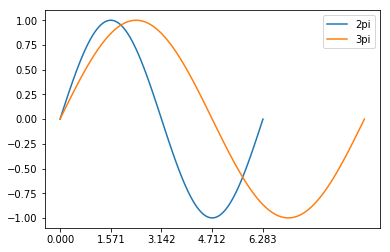

In [57]:
fig

In [56]:
xax = ax.xaxis
yax = ax.yaxis
print('xax.get_major_formatter()', xax.get_major_formatter())
print('yax.get_major_formatter()', yax.get_major_formatter())
print('xax.get_major_locator():',  xax.get_major_locator())
print('yax.get_major_locator():',  yax.get_major_locator())

xax.get_major_formatter() <matplotlib.ticker.ScalarFormatter object at 0x11c8b2be0>
yax.get_major_formatter() <matplotlib.ticker.ScalarFormatter object at 0x11caef6d8>
xax.get_major_locator(): <matplotlib.ticker.FixedLocator object at 0x11cb112e8>
yax.get_major_locator(): <matplotlib.ticker.AutoLocator object at 0x11cae5278>


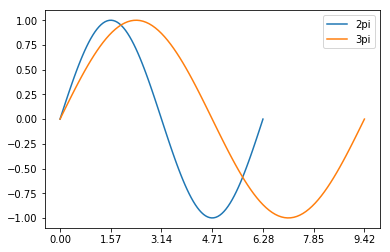

In [63]:
import matplotlib.ticker as ticker # this is required to used `Ticker`
ax.xaxis.set_major_locator(ticker.MultipleLocator(.5*np.pi)) # locate ticks at every 0.5*pi
fig # display the figure again with new locator.

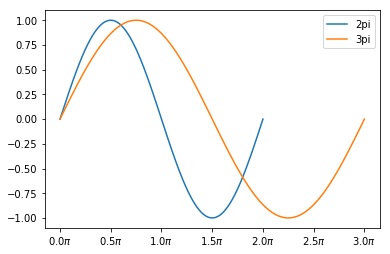

In [70]:
@ticker.FuncFormatter # FuncFormatter can be used as a decorator
def major_formatter_radian(x, pos):
    return '{}$\pi$'.format(x/np.pi) # probably not the best way to show radian tick labels

ax.xaxis.set_major_formatter(major_formatter_radian)
fig

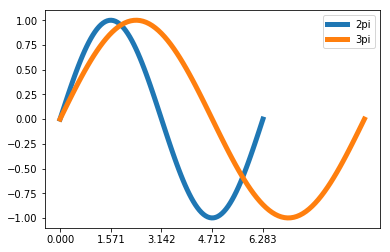

In [98]:
plt.rcParams['lines.linewidth'] = 5
x = np.linspace(0, 2*np.pi, 100)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1 = ax.plot(x, np.sin(x), label='2pi') # X range: 0 to 2pi
ax.set_xticks([0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
line2 = ax.plot(1.5*x, np.sin(x), label='3pi') # X range: 0 to 3pi
ax.legend()
plt.show()